In [1]:
using DifferentialEquations
using Plots
using LaTeXStrings

In [2]:
function sist1!(du,u,p,t)
    a,b,c = p
    du[1] = a*(u[2]-u[1])
    du[2] = u[1]*(b-u[3]) - u[2]
    du[3] = u[1]*u[2] - c*u[3]
end

sist1! (generic function with 1 method)

In [3]:
 # Ojo, aquí, u[1] es y, u[2] es z.
function sist2!(du,u,p,t)
    u1, b, c = p    
    x = u1(t)  # Access the value of u[1] at time t
    du[1] = x*(b-u[2]) - u[1]
    du[2] = x*u[1] - c*u[2]
end

sist2! (generic function with 1 method)

In [4]:
# Parámetros a usar
p = [10, 28, 8/3]

# Definir el rango de tiempo
tspan = (0.0, 30.0)

(0.0, 30.0)

## Solución de dos sistemas de Lorenz con condiciones iniciales diferentes

Aquí podemos ver qué pasa si, en un sistema con los mismos parámetros ($\sigma$, $r$ y $b$), la condición inicial cambia aunque sea un poco. Tenemos dos condiciones iniciales: $(2, 1, 1)$ y $(2, -2, -2)$.

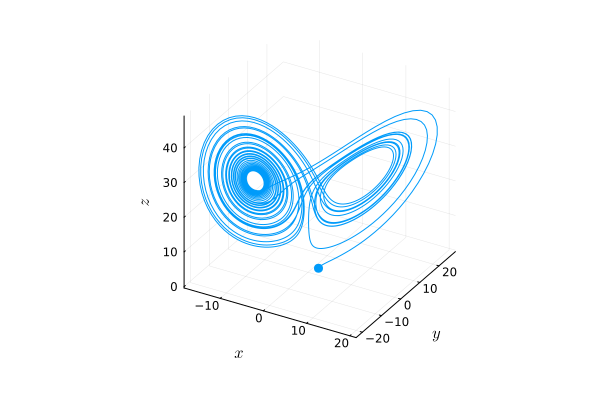

In [5]:
# Solución con una condición inicial
u0 = [2, 1, 1]
problema = ODEProblem(sist1!, u0, tspan, p)
sol1 = solve(problema, Tsit5())
    
# La gráfica que nos dio el profesor
plot(sol1,idxs=(1,2,3), xlabel=L"x", ylabel=L"y", zlabel=L"z", label="")
scatter!([u0[1]],[u0[2]],[u0[3]], color=1, markersize=5,
    markerstrokewidth=0, label="")
#savefig("lorenz1.pdf")

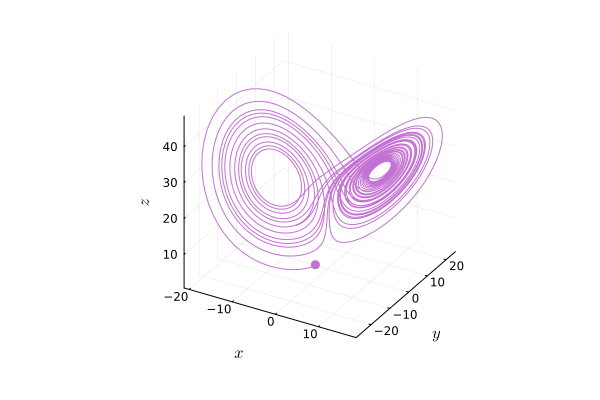

In [6]:
# Solución con una condición inicial ligeramente diferente
u0_1 = [-2, -2, 2]
problema = ODEProblem(sist1!, u0_1, tspan, p)
sol1_1 = solve(problema, Tsit5())
    
# La gráfica que nos dio el profesor
plot(sol1_1,idxs=(1,2,3), xlabel=L"x", ylabel=L"y", zlabel=L"z", label="", color=4)
scatter!([u0_1[1]],[u0_1[2]],[u0_1[3]], color=4, markersize=5,
    markerstrokewidth=0, label="")
#savefig("lorenz1.pdf")

¿Qué pasa si ponemos ambas soluciones una encima de la otra? Aunque las condiciones iniciales están cerca entre ellas, las órbitas son muy diferentes.

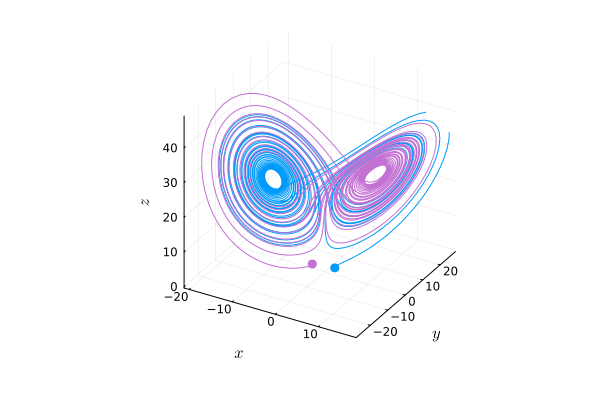

In [7]:
plot(sol1,idxs=(1,2,3), label="")
scatter!([u0[1]],[u0[2]],[u0[3]], color=1, markersize=5,
    markerstrokewidth=0, label="")
plot!(sol1_1,idxs=(1,2,3), label="", color=4)
scatter!([u0_1[1]],[u0_1[2]],[u0_1[3]], color=4, markersize=5,
    markerstrokewidth=0, label="")

xlabel!(L"x")
ylabel!(L"y")
zlabel!(L"z")

Podemos hacer un corte y mostrar la vista de los ejes $y$ y $z$ nada más.

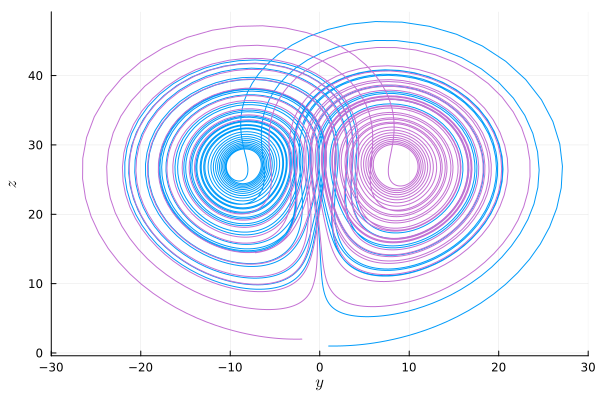

In [8]:
plot(sol1,idxs=(2,3), label="")
plot!(sol1_1,idxs=(2,3), label="", color=4)
xlims!(-30,30)
xlabel!(L"y")
ylabel!(L"z")

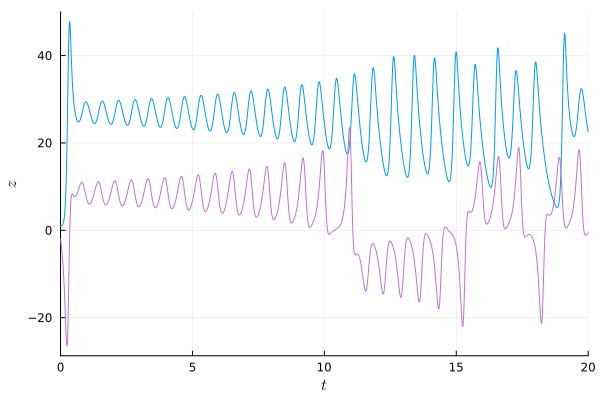

In [9]:
# Ahora veremos la componente z
plot(sol1, idxs=(0, 3), label="")
plot!(sol1_1, idxs=(0, 2), label="", color=4)
xlims!(0.0, 20)
xlabel!(L"t")
ylabel!(L"z")

## Enviando una señal de un sistema a otro

In [10]:
# Usaremos la solución del primer sistema para resolver el segundo
p2 = (t -> sol1(t)[1], p[2], p[3])

# Nótese la nueva condición inicial
problema2 = ODEProblem(sist2!, [u0_1[2], u0_1[3]], tspan, p2)
sol2 = solve(problema2, Tsit5())
print() # Para que no se vea todo el texto

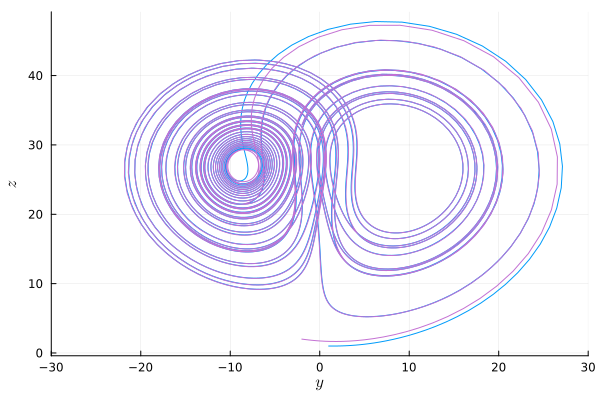

In [11]:
plot(sol1,idxs=(2,3), label="")
plot!(sol2,idxs=(1,2), label="", color=4)
xlims!(-30,30)
xlabel!(L"y")
ylabel!(L"z")

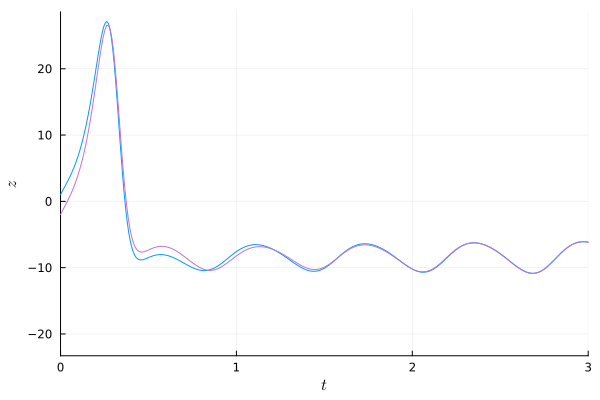

In [12]:
# Ahora veremos la componente y
plot(sol1, idxs=(0, 2), label="")
plot!(sol2, idxs=(0, 1), label="", color=4)
xlims!(0.0, 3)
xlabel!(L"t")
ylabel!(L"z")

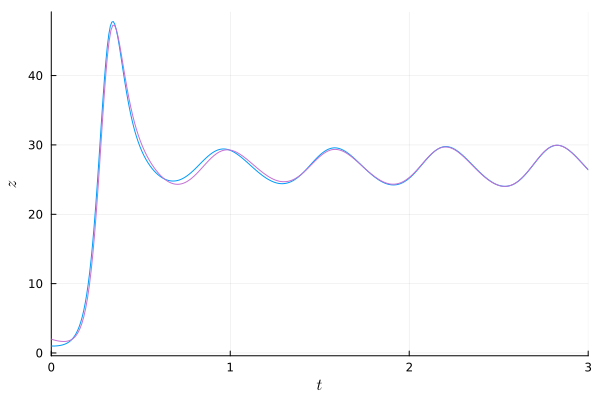

In [13]:
# Ahora veremos la componente z
plot(sol1, idxs=(0, 3), label="")
plot!(sol2, idxs=(0, 2), label="", color=4)
xlims!(0.0, 3)
xlabel!(L"t")
ylabel!(L"z")

## ¿Qué pasa si alteramos aún más la condición inicial?

Todo se sincroniza también

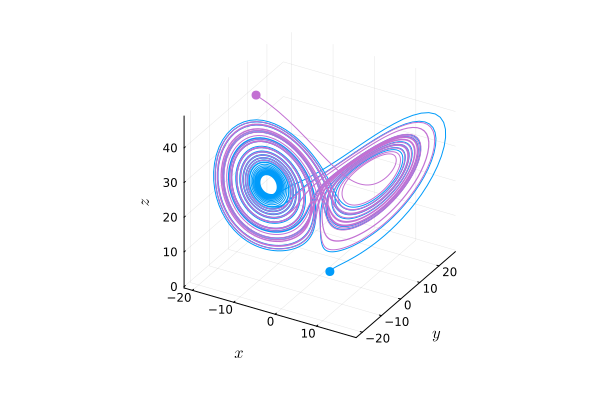

In [14]:
u2 = [-20, 10, 40]
problema = ODEProblem(sist1!, u2, tspan, p)
sol3 = solve(problema, Tsit5())

# Gráfica ANTES de enviar una señal
plot(sol1,idxs=(1,2,3), label="")
scatter!([u0[1]],[u0[2]],[u0[3]], color=1, markersize=5,
    markerstrokewidth=0, label="")
plot!(sol3,idxs=(1,2,3), xlabel=L"x", ylabel=L"y", zlabel=L"z", label="", color=4)
scatter!([u2[1]],[u2[2]],[u2[3]], color=4, markersize=5,
    markerstrokewidth=0, label="")

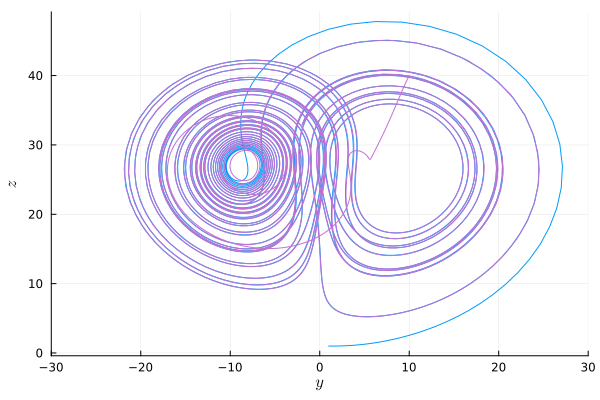

In [15]:
# Enviando la señal ahora sí
# Usaremos la solución del primer sistema para resolver el segundo
p3 = (t -> sol1(t)[1], p[2], p[3])

# Nótese la nueva condición inicial
problema = ODEProblem(sist2!, [u2[2], u2[3]], tspan, p3)
sol4 = solve(problema, Tsit5())
plot(sol1,idxs=(2,3), label="")
plot!(sol4,idxs=(1,2), label="", color=4)
xlims!(-30,30)
xlabel!(L"y")
ylabel!(L"z")

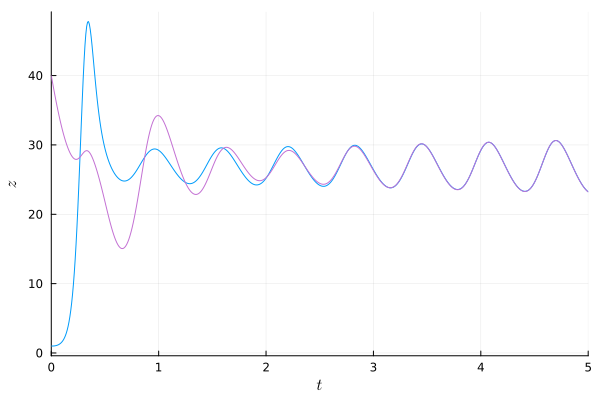

In [16]:
# Ahora veremos la componente z
plot(sol1, idxs=(0, 3), label="")
plot!(sol4, idxs=(0, 2), label="", color=4)
xlims!(0.0, 5)
xlabel!(L"t")
ylabel!(L"z")